# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
os.chdir('/content/drive/My Drive/Deep Learning/Face Detection/')

### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [0]:
data = np.load('images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (4 marks)

In [4]:
sample = data[0]
sample

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

In [5]:
sample.shape

(2,)

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
  img = data[index][0]
  img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
  try:
    img = img[:, :, :3]
  except:
    continue
  X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
  for i in data[index][1]:
    x1 = int(i['points'][0]['x'] * IMAGE_WIDTH)
    x2 = int(i['points'][1]['x'] * IMAGE_WIDTH)
    y1 = int(i['points'][0]['y'] * IMAGE_HEIGHT)
    y2 = int(i['points'][1]['y'] * IMAGE_HEIGHT)
    masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [8]:
#### Add your code here ####
print("Shape of X_train is {}".format(X_train.shape))

Shape of X_train is (409, 224, 224, 3)


In [9]:
#### Add your code here ####
print("Shape of mask is {}".format(masks.shape))

Shape of mask is (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.22352946 -0.20784312 -0.51372552]
  [ 0.28627455 -0.21568626 -0.51372552]
  [ 0.30980396 -0.23921567 -0.49803919]
  ...
  [ 0.94509804  0.7647059   0.25490201]
  [ 0.57647061  0.25490201 -0.15294117]
  [ 0.45882356  0.15294123 -0.15294117]]

 [[ 0.4039216  -0.09803921 -0.46666664]
  [ 0.27058828 -0.26274508 -0.53725493]
  [ 0.34117651 -0.1607843  -0.52156866]
  ...
  [ 0.74117649  0.4666667   0.15294123]
  [ 0.52941179  0.18431377 -0.16862744]
  [ 0.6156863   0.3176471   0.01176476]]

 [[ 0.32549024 -0.14509803 -0.47450978]
  [ 0.60000002  0.05882359 -0.372549  ]
  [ 0.87450981  0.27843142 -0.26274508]
  ...
  [ 0.56078434  0.27843142 -0.06666666]
  [ 0.3176471   0.04313731 -0.27058822]
  [ 0.63921571  0.34117651  0.03529418]]

 ...

 [[-0.44313723 -0.68627453 -0.89803922]
  [-0.29411763 -0.60784316 -0.84313726]
  [-0.23137254 -0.56862748 -0.89019608]
  ...
  [-0.58431375 -0.78039217 -0.85882354]
  [-0.63137257 -0.80392158 -0.88235295]
  [-0.372549   -0.41176468 -0.43529409]]

 [

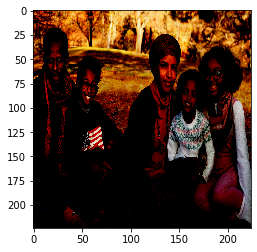

In [10]:
from matplotlib import pyplot
n = 12
print(X_train[n])
pyplot.imshow(X_train[n])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


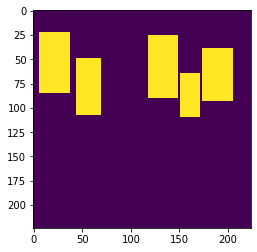

In [11]:
print(masks[n])
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights='imagenet')
    for layer in model.layers:
      layer.trainable = trainable

    block1 = model.get_layer('input_1').output
    block2 = model.get_layer('conv_pw_1_relu').output
    block3 = model.get_layer('conv_pw_3_relu').output
    block4 = model.get_layer('conv_pw_5_relu').output
    block5 = model.get_layer('conv_pw_11_relu').output
    block6 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation='sigmoid')(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.inputs, outputs=x)

### Call the create_model function

In [13]:
tf.keras.backend.clear_session()
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [18]:
model.fit(x=X_train, y=masks, epochs=20,batch_size=1, callbacks=[checkpoint, reduce_lr, stop], verbose=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples
Epoch 1/20
408/409 [============================>.] - ETA: 0s - loss: 1.2315 - dice_coefficient: 0.5041
Epoch 00001: loss improved from inf to 1.23193, saving model to model-1.23.h5
409/409 [==============================] - 40s 98ms/sample - loss: 1.2319 - dice_coefficient: 0.5043
Epoch 2/20
408/409 [============================>.] - ETA: 0s - loss: 0.8211 - dice_coefficient: 0.6081
Epoch 00002: loss improved from 1.23193 to 0.82058, saving model to model-0.82.h5
409/409 [==============================] - 27s 65ms/sample - loss: 0.8206 - dice_coefficient: 0.6083
Epoch 3/20
408/409 [============================>.] - ETA: 0s - loss: 0.6970 - dice_coefficient: 0.6557
Epoch 00003: loss improved from 0.82058 to 0.69668, saving model to model-0.70.h5
409/409 [==============================] - 26s 65ms/sample - loss: 0.6967 - dice_coefficient: 0.6557
Epoch 4/20
408/409 [========

### Get the predicted mask for a sample image   (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


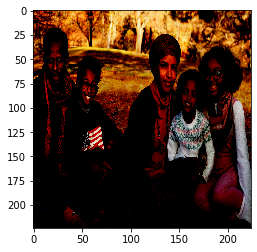

In [19]:
plt.imshow(X_train[n])

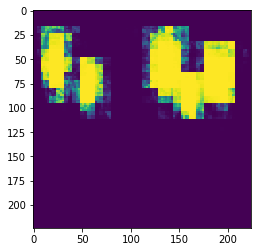

In [20]:
region = model.predict(np.array([X_train[n]]))[0]
plt.imshow(region)

### Impose the mask on the image (5 marks)

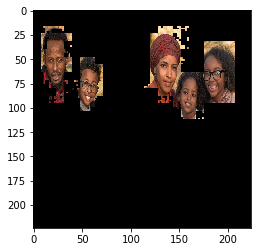

In [22]:
unscaled = data[n][0]
image = cv2.resize(unscaled, (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize((1.0 * (model.predict(np.array([feat_scaled]))[0] > 0.5)),(IMAGE_HEIGHT, IMAGE_WIDTH))

imposed_image = image
imposed_image[:,:,0] = pred_mask * image[:,:,0]
imposed_image[:,:,1] = pred_mask * image[:,:,1]
imposed_image[:,:,2] = pred_mask * image[:,:,2]

plt.imshow(imposed_image)